# Data understanding 

In [2]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

feature_duration_ms is practically the same as duration_ms, so we can may remove it. Furthermore we can convert from ms in minute to have numbers more easy to read and more common to represent the duration of the songs

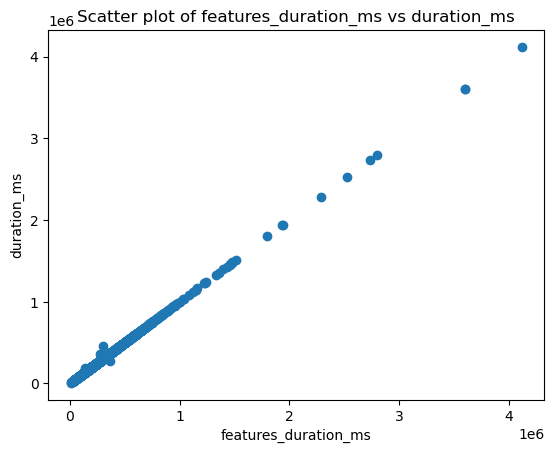

In [4]:
plt.scatter(df['features_duration_ms'], df['duration_ms'])  # Plotting sepal width against petal length.
plt.xlabel('features_duration_ms')
plt.ylabel('duration_ms')
plt.title('Scatter plot of features_duration_ms vs duration_ms')
plt.show()

### Gestione missing values

- Popularity_confidence is an attribute that doesn't adds nothing to the global information of the DataFrame, furthermore this attribute have too much missing values, so we may remove it

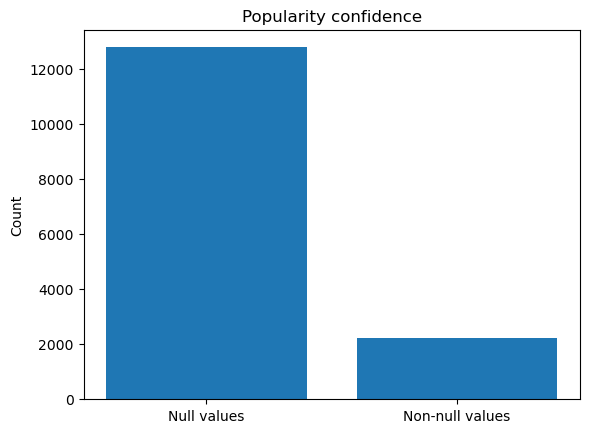

In [5]:
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. 

In [6]:
mode=list(df["mode"])
print(mode[0:20])

[1.0, 0.0, nan, 1.0, 1.0, nan, 1.0, nan, nan, 1.0, 1.0, 0.0, 1.0, nan, nan, nan, 0.0, nan, nan, 0.0]


For the binarization we must remove the missing values, if we have some important correlation we can calculate the missing value based on other values, but if we haven't important correlation we can substitute the missing values with the mode or calculating him form the genre that can be more happy or sad. 

In [7]:
correlations = df.corr(method="pearson")
print(correlations["mode"])

duration_ms             -0.023310
explicit                -0.042846
popularity               0.073043
danceability            -0.072422
energy                  -0.079969
key                     -0.157515
loudness                -0.033544
mode                     1.000000
speechiness             -0.064289
acousticness             0.085246
instrumentalness        -0.080035
liveness                 0.015738
valence                 -0.006907
tempo                   -0.013001
features_duration_ms    -0.023409
time_signature          -0.019378
n_beats                 -0.030685
n_bars                  -0.027687
popularity_confidence    0.003698
processing               0.261129
Name: mode, dtype: float64


Since there are no important correlations, we will use the mode to substitute the missing values

In [8]:
df["mode"].mode()[0]

1.0

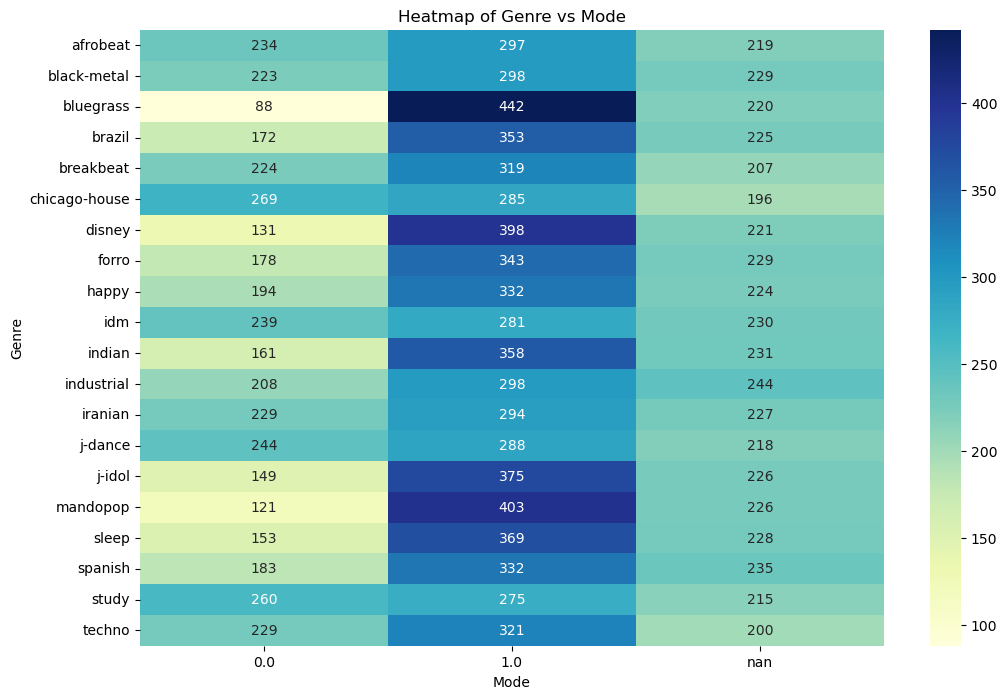

In [9]:
df['mode'] = df['mode'].astype(str)

contingency_table = pd.crosstab(df['genre'], df['mode'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Genre vs Mode')
plt.xlabel('Mode')
plt.ylabel('Genre')
plt.show()

In [10]:
mode_order = sorted(df['mode'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print(mode_order_mapping)

df['mode'] = df['mode'].map(mode_order_mapping).astype(int)
df.head()

{'0.0': 0, '1.0': 1, 'nan': 2}


,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


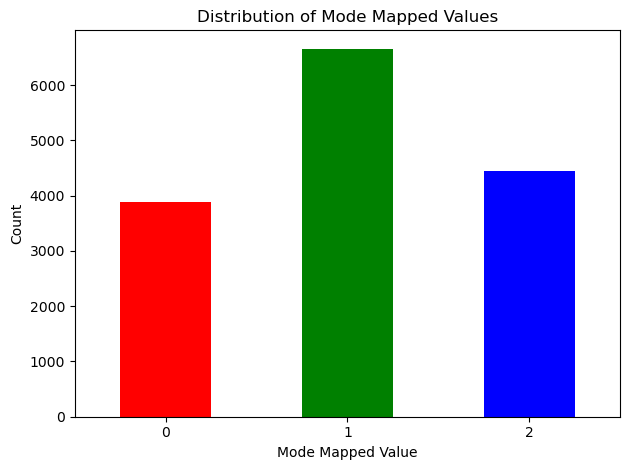

In [11]:
df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gestione time_signature

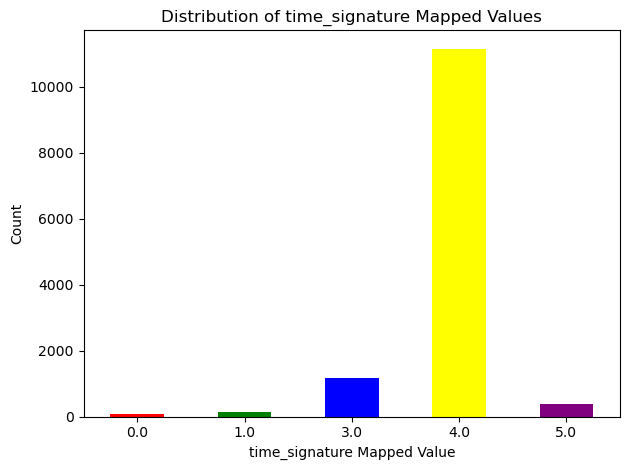

In [15]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
correlation_with_time_signature = df.corrwith(df['time_signature'])
correlation_df = pd.DataFrame(correlation_with_time_signature, columns=['Correlation'])
correlation_df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,Correlation
duration_ms,0.009033
explicit,0.051260
popularity,-0.003160
danceability,0.292167
energy,0.204646
key,0.028388
loudness,0.250568
mode,-0.012587
speechiness,0.080739
acousticness,-0.139706


Using the median to replace missing values in "time_signature" is advisable because it's less sensitive to outliers, providing a more accurate representation of typical time signatures in the dataset. The median is particularly suitable for categorical or ordinal data like time signatures, where mean values can be misleading or non-representative.